# **SMS Spam Detection**

# 1. Importing Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Loading the Dataset

In [16]:
dataset = pd.read_csv('spam.csv',encoding='latin-1', engine='python', usecols=['v1','v2']) 
dataset.columns = ['Label','Message']

# 3. Exploring the Dataset

In [17]:
print(dataset.head())

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [18]:
print(dataset.tail())

     Label                                            Message
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name


In [19]:
print(dataset.count())

Label      5572
Message    5572
dtype: int64


In [20]:
print(dataset.shape)

(5572, 2)


In [21]:
print(dataset.size)

11144


In [22]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [23]:
print(dataset.describe())

       Label                 Message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [24]:
print(dataset.dtypes)

Label      object
Message    object
dtype: object


In [25]:
print(dataset.isnull().sum())

Label      0
Message    0
dtype: int64


In [26]:
print(dataset.Label.unique())

['ham' 'spam']


In [27]:
print(dataset.Label.value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


# 4. Removing Duplicated Rows

In [28]:
print(dataset.duplicated().value_counts())

False    5169
True      403
Name: count, dtype: int64


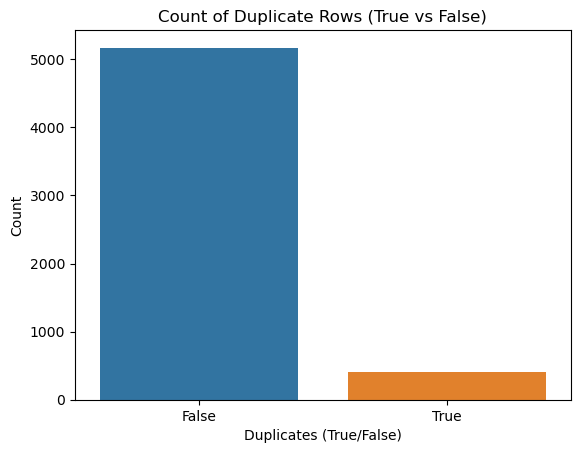

In [15]:
duplicates = dataset.duplicated()
duplicate_counts = duplicates.value_counts()
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values)
plt.title('Count of Duplicate Rows (True vs False)')
plt.xlabel('Duplicates (True/False)')
plt.ylabel('Count')
plt.show()

In [29]:
dataset.drop_duplicates(inplace=True)

# 5. Data Distribution Visualization

<Figure size 640x480 with 0 Axes>

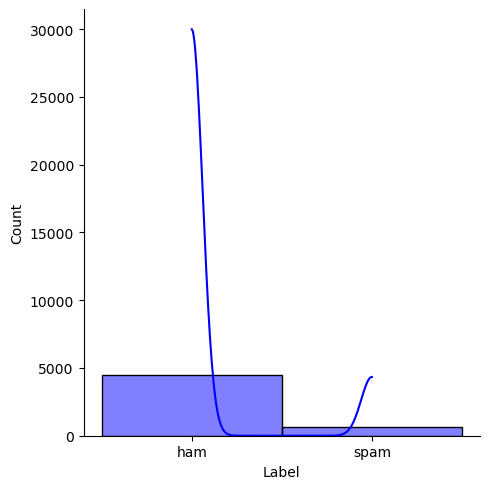

In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib.pyplot as plt
plt.tight_layout()
sns.displot(dataset['Label'], kde=True,color='blue')

<Axes: xlabel='Label', ylabel='count'>

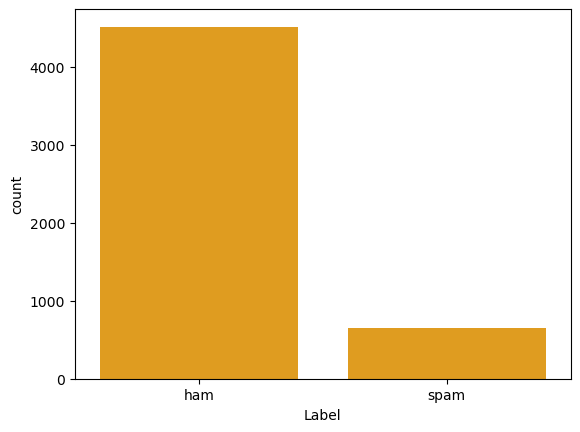

In [31]:
sns.countplot(x='Label', data=dataset, color='orange')

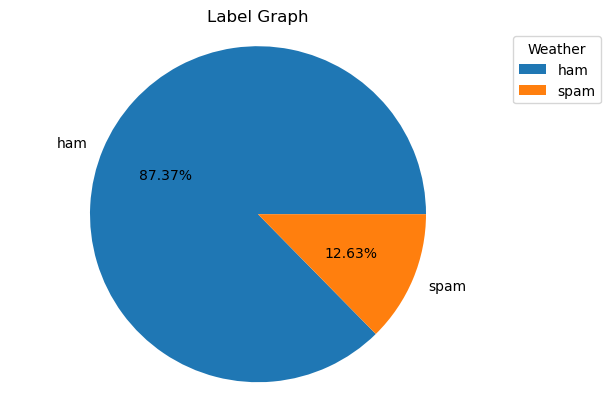

In [32]:
label = dataset. Label.value_counts()
plt.pie(label.values,labels =label.index, autopct='%1.2f%%')
plt.legend(loc='upper left', title='Weather', bbox_to_anchor=(1,1))
plt.title("Label Graph")
plt.axis('equal')
plt.show()

# 6. Encoding Labels

In [33]:
encoder = LabelEncoder() 
dataset['Label'] = encoder.fit_transform(dataset['Label'])

In [34]:
print(dataset.head())

   Label                                            Message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


# 7. Text Vectorization

In [35]:
vectorize = TfidfVectorizer(stop_words='english') 
X = vectorize.fit_transform(dataset['Message']).toarray() 
Y = dataset['Label']

# 8. Splitting the Data

In [36]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,shuffle=True)

# Naive_Bayes Classifier

In [37]:
Mul_NB = MultinomialNB()
Mul_NB.fit(X_train, Y_train)
Mul_pred = Mul_NB.predict(X_test)
print(f"Training Score: {Mul_NB.score (X_train, Y_train)}")
print(f"Testing Score: {Mul_NB.score(X_test,Y_test)}")
print(f"Accuracy Score: {accuracy_score (Y_test, Mul_pred)}")
print(f"Confusion Matrix: {confusion_matrix(Y_test, Mul_pred)}")
print(f"Classification Report: {classification_report(Y_test, Mul_pred)}")
print(f'Cross-Validation : {cross_val_score (Mul_NB, X, Y, cv=5, scoring="accuracy").mean()}')

Training Score: 0.9750906892382104
Testing Score: 0.9584139264990329
Accuracy Score: 0.9584139264990329
Confusion Matrix: [[885   0]
 [ 43 106]]
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.98       885
           1       1.00      0.71      0.83       149

    accuracy                           0.96      1034
   macro avg       0.98      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034

Cross-Validation : 0.9630482285731405


# LogisticRegression Model

In [38]:
Log_Reg=LogisticRegression()
Log_Reg.fit(X_train, Y_train)
Log_pred = Log_Reg.predict(X_test)

print("Training Score: {Log_Reg.score(X_train, Y_train)}")
print(f"Testing Score: {Log_Reg.score (X_test,Y_test)}")

print(F'Accuracy Score: {accuracy_score (Y_test, Log_pred)}')
print(f'Confusion Matrix: {confusion_matrix(Y_test, Log_pred)}')
print(f'Classification Report: {classification_report(Y_test, Log_pred)}')
print(f'Cross-Validation : {cross_val_score (Log_Reg, X, Y, cv=5, scoring="accuracy").mean()}')

Training Score: {Log_Reg.score(X_train, Y_train)}
Testing Score: 0.9390715667311412
Accuracy Score: 0.9390715667311412
Confusion Matrix: [[884   1]
 [ 62  87]]
Classification Report:               precision    recall  f1-score   support

           0       0.93      1.00      0.97       885
           1       0.99      0.58      0.73       149

    accuracy                           0.94      1034
   macro avg       0.96      0.79      0.85      1034
weighted avg       0.94      0.94      0.93      1034

Cross-Validation : 0.9450568380765493


# SVM Model

In [ ]:
SVM=SVC()
SVM.fit(X_train, Y_train)
SVM_pred = SVM.predict(X_test)

print(f"Training Score: {SVM.score(X_train, Y_train)}")
print(f"Testing Score: {SVM.score (X_test,Y_test)}")
print(f'Accuracy Score: {accuracy_score(Y_test, SVM_pred)}')
print(f'Confusion Matrix: {confusion_matrix(Y_test, SVM_pred)}')
print(f'Classification Report: {classification_report(Y_test, SVM_pred)}')
print(f'Cross-Validation : {cross_val_score(SVM, X, Y, cv=5, scoring="accuracy").mean()}')

Training Score: 0.9983071342200726
Testing Score: 0.9680851063829787
Accuracy Score: 0.9680851063829787
Confusion Matrix: [[884   1]
 [ 32 117]]
Classification Report:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       885
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

